In [ ]:
#1 objective = energy purchase kWhr x electrict tariff
#2 objective = overall LF

In [55]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
plt.rcParams['figure.figsize'] = 20, 10
import matplotlib.gridspec as gridspec
plt.rcParams.update({'font.size': 22})
from math import isnan


In [142]:
#tariff rate: off-peak (0.00-9.00, 22.00-24.00) = 2.6295
# peak (9.00 -22.00 )=4.2097
#energy charge = 132.93 THB/kW
array_tarrif=np.array([2.6295 for x in np.arange(0,18,1)]+[4.2097 for x in np.arange(0,26,1)]+[2.6295 for x in np.arange(0,4,1)])

In [2]:
dict_AMR_MC=np.load('dict_MC_AMR.npy')[()]


In [6]:
dict_tarrif={}
for AMR_id in list(dict_AMR_MC.keys()):
    dict_tarrif.update({AMR_id:np.array([2.6295 for x in np.arange(0,18,1)]+[4.2097 for x in np.arange(0,26,1)]+[2.6295 for x in np.arange(0,4,1)])})

In [7]:
dict_tarrif

{21652: array([2.6295, 2.6295, 2.6295, 2.6295, 2.6295, 2.6295, 2.6295, 2.6295,
        2.6295, 2.6295, 2.6295, 2.6295, 2.6295, 2.6295, 2.6295, 2.6295,
        2.6295, 2.6295, 4.2097, 4.2097, 4.2097, 4.2097, 4.2097, 4.2097,
        4.2097, 4.2097, 4.2097, 4.2097, 4.2097, 4.2097, 4.2097, 4.2097,
        4.2097, 4.2097, 4.2097, 4.2097, 4.2097, 4.2097, 4.2097, 4.2097,
        4.2097, 4.2097, 4.2097, 4.2097, 2.6295, 2.6295, 2.6295, 2.6295]),
 136898: array([2.6295, 2.6295, 2.6295, 2.6295, 2.6295, 2.6295, 2.6295, 2.6295,
        2.6295, 2.6295, 2.6295, 2.6295, 2.6295, 2.6295, 2.6295, 2.6295,
        2.6295, 2.6295, 4.2097, 4.2097, 4.2097, 4.2097, 4.2097, 4.2097,
        4.2097, 4.2097, 4.2097, 4.2097, 4.2097, 4.2097, 4.2097, 4.2097,
        4.2097, 4.2097, 4.2097, 4.2097, 4.2097, 4.2097, 4.2097, 4.2097,
        4.2097, 4.2097, 4.2097, 4.2097, 2.6295, 2.6295, 2.6295, 2.6295]),
 137091: array([2.6295, 2.6295, 2.6295, 2.6295, 2.6295, 2.6295, 2.6295, 2.6295,
        2.6295, 2.6295, 2.6295, 2.629

AMR id: 21652
AMR id: 136898
AMR id: 137091
AMR id: 137138
AMR id: 42432
AMR id: 66543
AMR id: 21654
AMR id: 42421
AMR id: 42423
AMR id: 43958
AMR id: 137110
AMR id: 42422
AMR id: 21655
AMR id: 42431
AMR id: 44834
AMR id: 56452
AMR id: 56457
AMR id: 56458
AMR id: 124642
AMR id: 124647
AMR id: 124649
AMR id: 124656
AMR id: 124683
AMR id: 185767
AMR id: 56448
AMR id: 136900
AMR id: 137094
AMR id: 164978
AMR id: 189318
AMR id: 193781
AMR id: 44318
AMR id: 124687
AMR id: 21689
AMR id: 44831
AMR id: 56459
AMR id: 124678


C:\Users\ece\Desktop\Pornchai\Anaconda\envs\pornchai\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in double_scalars


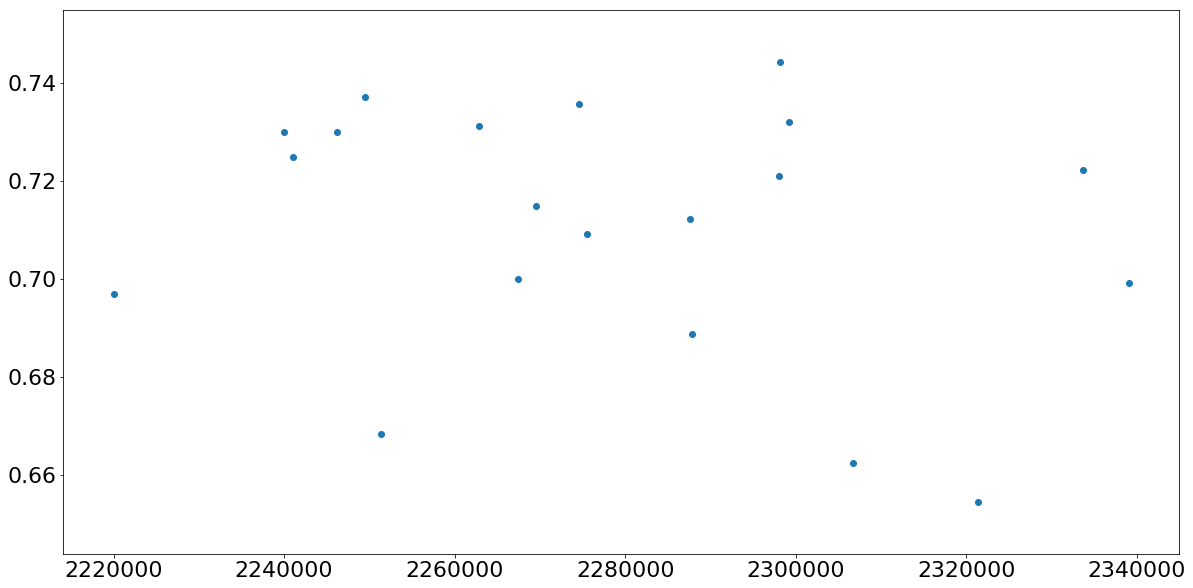

In [65]:
dict_AMR_MC=np.load('dict_MC_AMR.npy')[()]
dict_AMR_avg_cost_LF={}

#energy purchasing
array_sub_cost=([[],[],[],[],[],
                  [],[],[],[],[],
                  [],[],[],[],[],
                  [],[],[],[],[]])
for AMR_id in list(dict_AMR_MC.keys()):
    print('AMR id:', AMR_id)
    array_kW=np.array([[],[],[],[],[],
                  [],[],[],[],[],
                  [],[],[],[],[],
                  [],[],[],[],[]])
    array_LF=np.array([])
    for t in list(dict_AMR_MC[AMR_id].keys()):
        kW_data=np.array([[dict_AMR_MC[AMR_id][t][sample]] for sample in np.arange(0,20,1)])
        array_kW=np.append(array_kW, kW_data, axis=1)
#         print(kW_data)
#         LF_data=np.array([kW_data.mean()/kW_data.max()])
#         print(LF_data)
#         array_LF=np.append(array_LF, LF_data, axis=0)
#     array_AMR_cost=array_kW*array_tarrif
    LF_data=np.array([x.mean()/x.max() for x in array_kW])
#     print(LF_data)
    array_AMR_cost=array_kW*dict_tarrif[AMR_id]
#     print(array_LF)
#     print('average cost:',array_AMR_cost.sum(axis=1).sum()/20)
#     print('average LF:',LF_data.mean())

    dict_AMR_avg_cost_LF.update({AMR_id:{"avg_cost":array_AMR_cost.sum(axis=1).sum()/20, "avg_LF":LF_data.mean()}})
#     print(array_AMR_cost.sum(axis=1))
#     print(np.array([[x] for x in array_AMR_cost.sum(axis=1)]))
    array_sub_cost=np.append(array_sub_cost, np.array([[x] for x in array_AMR_cost.sum(axis=1)]), axis=1)
#     array_sub_cost=array_sub_cost+np.array([[x] for x in array_AMR_cost.sum(axis=1)])
array_sub_cost=np.array([x.sum() for x in array_sub_cost])



#find substation LF
array_sub_LF=np.array([])
for sample in np.arange(0,20,1):
    array_sum_kW=np.array([])
    for t in ['t{}'.format(x) for x in np.arange(0,48,1)]:
        array_AMR_kW=np.array([dict_AMR_MC[AMR_id][t][sample] for AMR_id in list(dict_AMR_MC.keys())])
        array_sum_kW=np.append(array_sum_kW,array_AMR_kW.sum())
    LF=array_sum_kW.mean()/array_sum_kW.max()
    array_sub_LF=np.append(array_sub_LF,LF)

fig, ax = plt.subplots()
ax.scatter(array_sub_cost,array_sub_LF)
plt.show()

In [56]:
del dict_AMR_avg_cost_LF[42422]

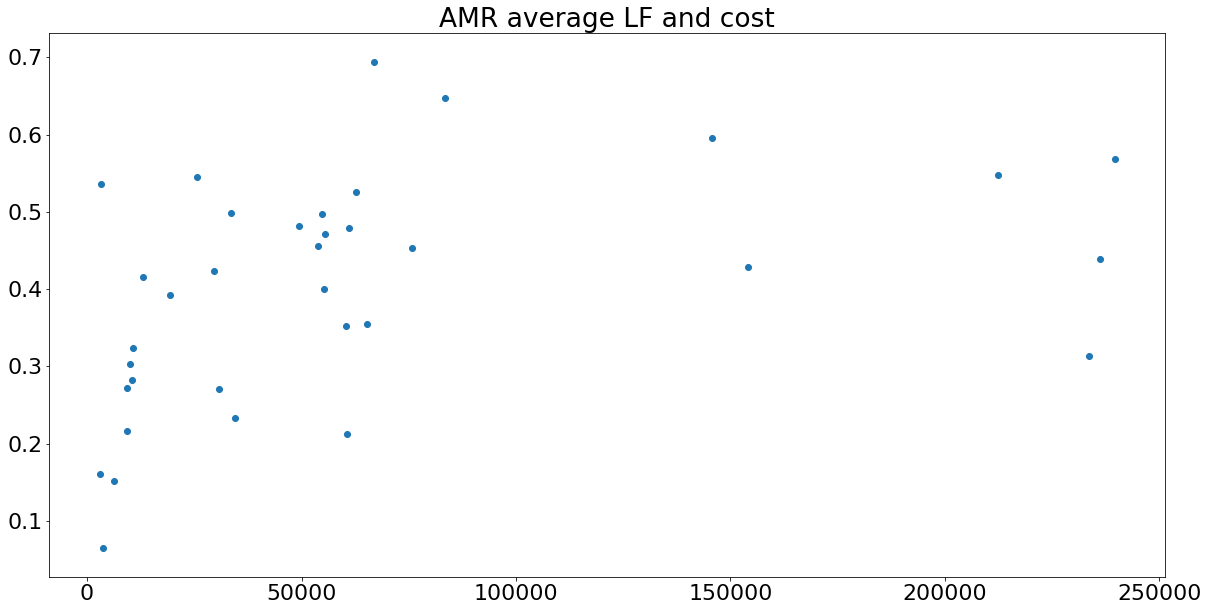

In [67]:

x=[ dict_AMR_avg_cost_LF[x]['avg_cost'] for x in dict_AMR_avg_cost_LF]
y=[ dict_AMR_avg_cost_LF[y]['avg_LF'] for y in dict_AMR_avg_cost_LF]

fig, ax = plt.subplots()
ax.scatter(x,y)
ax.set_title('AMR average LF and cost')
plt.show()

In [69]:
for x in dict_AMR_avg_cost_LF:
    print(x, dict_AMR_avg_cost_LF[x]['avg_LF'])

21652 0.45310527146464646
136898 0.4292560108961211
137091 0.23357385919415843
137138 0.27061629234067375
42432 0.43860855376190644
66543 0.2831390542328042
21654 0.1515459656084656
42421 0.35454666893555714
42423 0.0652442357129857
43958 0.6939144736842106
137110 0.3236747685185185
42422 nan
21655 0.16090277777777778
42431 0.30353918650793654
44834 0.47934246992888596
56452 0.5480995391243542
56457 0.498894516941392
56458 0.5458366315397566
124642 0.5259801285754637
124647 0.4565669647390272
124649 0.5686880022495615
124656 0.4978834542134698
124683 0.4162487599206349
185767 0.3920880681818182
56448 0.48187264478798914
136900 0.6470984906804735
137094 0.3138439671131077
164978 0.2717993551587302
189318 0.5955667545508952
193781 0.3519958991506391
44318 0.42336767399267405
124687 0.5364583333333333
21689 0.21247973085901886
44831 0.471423987312961
56459 0.21615651709401712
124678 0.4009104462986507


In [57]:
clean_dict

{21652: {'avg_cost': 75834.83189999999, 'avg_LF': 0.45310527146464646},
 136898: {'avg_cost': 154126.4826, 'avg_LF': 0.4292560108961211},
 137091: {'avg_cost': 34416.8709, 'avg_LF': 0.23357385919415843},
 137138: {'avg_cost': 30749.438700000006, 'avg_LF': 0.27061629234067375},
 42432: {'avg_cost': 236190.13065, 'avg_LF': 0.43860855376190644},
 66543: {'avg_cost': 10462.524449999997, 'avg_LF': 0.2831390542328042},
 21654: {'avg_cost': 6212.56095, 'avg_LF': 0.1515459656084656},
 42421: {'avg_cost': 65213.4255, 'avg_LF': 0.35454666893555714},
 42423: {'avg_cost': 3642.9703500000005, 'avg_LF': 0.0652442357129857},
 43958: {'avg_cost': 66794.16765, 'avg_LF': 0.6939144736842106},
 137110: {'avg_cost': 10619.55435, 'avg_LF': 0.3236747685185185},
 42422: {'avg_cost': 0.0, 'avg_LF': nan},
 21655: {'avg_cost': 3033.2230499999996, 'avg_LF': 0.16090277777777778},
 42431: {'avg_cost': 10029.322049999999, 'avg_LF': 0.30353918650793654},
 44834: {'avg_cost': 61017.882, 'avg_LF': 0.47934246992888596},